In [76]:
import pandas as pd
import umap
import glob
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
# from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA, FastICA
# import psyplot.project as psy
from sklearn.svm import SVR

from sklearn.decomposition import PCA, KernelPCA

from matplotlib.colors import LogNorm
import math

In [77]:
path = "/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_left"
model_path = glob.glob(f"{path}/*")[0]
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
print(ukb_emb_file)

/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_left/20-56-02_1/ukb_random_embeddings/full_embeddings.csv


In [78]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


# UKBioBank

In [79]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [80]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


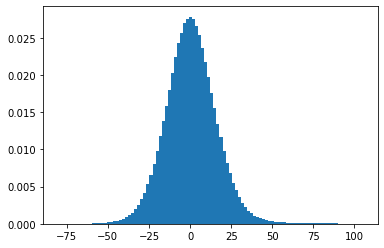

In [81]:
p = plt.hist(ukb_emb.values.ravel(), bins=100, density=True)

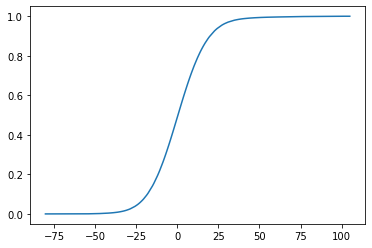

In [82]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [83]:
X2[int(N*0.59)]

3.6445594

In [84]:
len(ukb_emb)

21051

In [85]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [86]:
ukb_positive

dim176    1.000000
dim132    1.000000
dim110    0.989882
dim3      0.968648
dim192    0.903758
            ...   
dim226    0.175384
dim118    0.159090
dim66     0.139423
dim161    0.060947
dim204    0.000000
Length: 256, dtype: float64

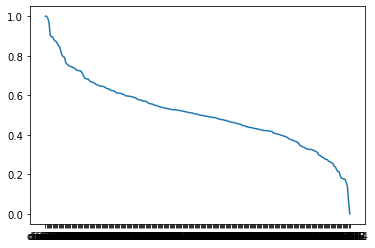

In [87]:
plt.plot(ukb_positive)

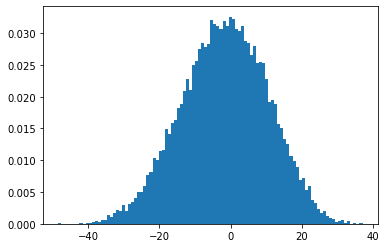

In [88]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

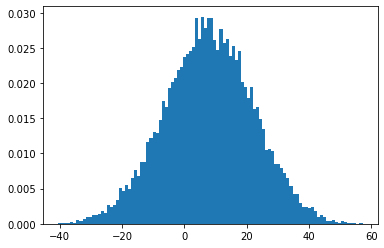

In [89]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [90]:
def compute_umap(df, n_neighbors=15, n_components=2):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [91]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [92]:
ukb_emb.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965


In [93]:
reduced_ukb_emb, reducer_red = compute_umap(ukb_emb, n_neighbors=15, n_components=20)

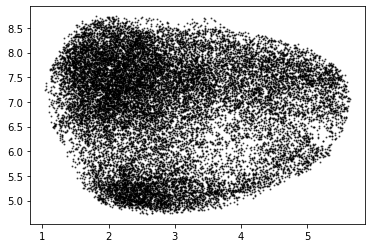

In [94]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [95]:
reduced_ukb_emb.shape

(21051, 20)

In [96]:
umap_ukb = visual_ukb_emb

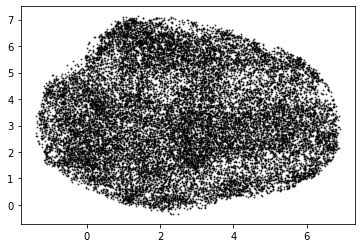

In [97]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

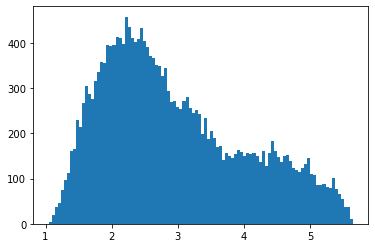

In [98]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

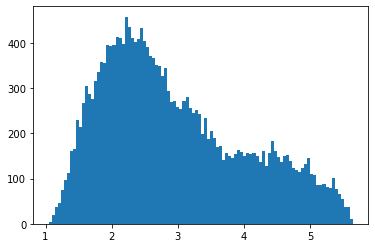

In [99]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

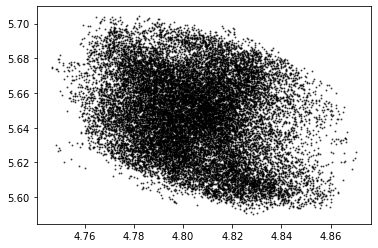

In [100]:
plt.scatter(reduced_ukb_emb[:,14], reduced_ukb_emb[:,15], c='black', s=1, alpha=0.6)

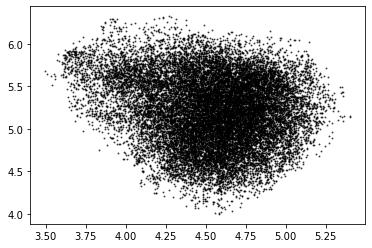

In [101]:
plt.scatter(reduced_ukb_emb[:,4], reduced_ukb_emb[:,5], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [102]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=5000)

In [103]:
global_id.dimension_

8.723032040257742

In [104]:
umap_id = skdim.id.MOM().fit(reduced_ukb_emb, n_neighbors=1000)
umap_id.dimension_

4.124064979692722

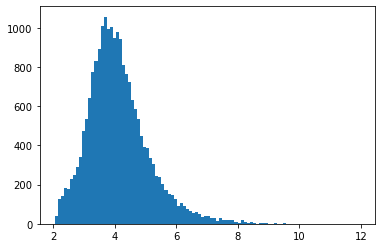

In [105]:
h = plt.hist(umap_id.dimension_pw_, bins=100)

In [106]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [107]:
# lid_mom.dimension_

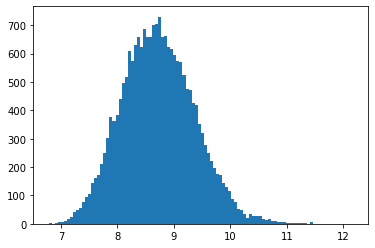

In [108]:

h = plt.hist(global_id.dimension_pw_, bins=100)

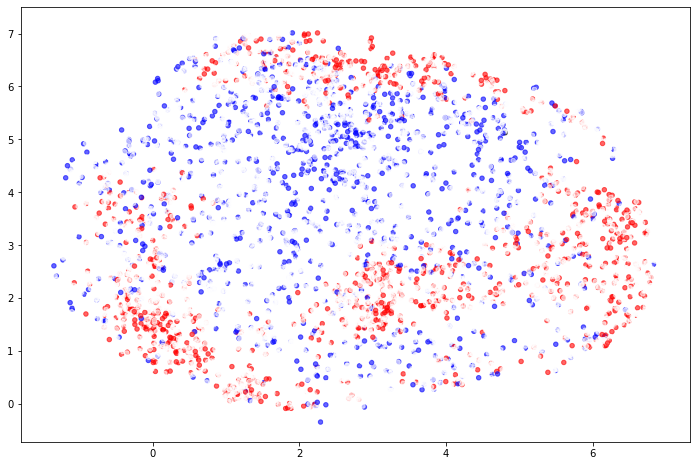

In [109]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

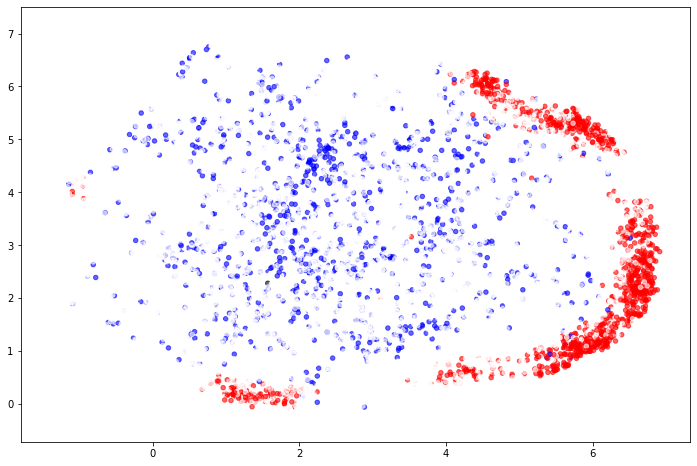

In [110]:
plt.figure(figsize=(12,8))
q_min = np.min(umap_id.dimension_pw_)
q_05 = np.quantile(umap_id.dimension_pw_, 0.05) 
q_95 = np.quantile(umap_id.dimension_pw_, 0.95)
q_max = np.max(umap_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=umap_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [111]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(ukb_emb)
distances, indices = nbrs.kneighbors(ukb_emb)

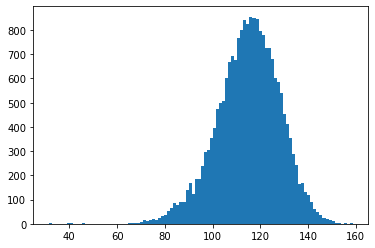

In [112]:
h = plt.hist(distances[:,1], bins=100)

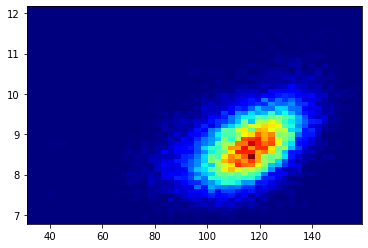

In [113]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

# UMAP of only lower dimensions

In [114]:
ukb_red = ukb_emb.copy(deep=True)
ukb_red.insert(0, "id", global_id.dimension_pw_)

In [115]:
ukb_red.insert(1, "umap_0", umap_ukb[:,0])
ukb_red.insert(2, "umap_1", umap_ukb[:,1])
ukb_red.insert(3, "distance", distances[:,1])
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,8.178361,4.030533,3.865372,111.129138,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,9.682804,0.545515,2.701742,130.086060,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,8.693795,-0.817198,1.620242,102.269753,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,9.160085,6.185807,4.427554,115.536251,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,8.944253,3.437053,5.073994,124.506553,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,7.859377,5.284100,2.031357,101.745406,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,8.728186,4.351602,1.434011,113.168261,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,9.637956,4.900072,3.242007,111.000407,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


In [116]:
ukb_red = ukb_red[ukb_red.id < np.quantile(global_id.dimension_pw_, 0.05) ]
# ukb_red = ukb_red[ukb_red.umap_0 > 6]

In [117]:
ukb_red.head()

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1002584,7.464054,5.472576,2.002522,92.064701,5.621493,-6.895737,10.349473,6.147973,-0.832192,-0.282892,...,5.245121,23.535913,-5.346692,22.328972,-6.155644,24.710846,-6.598261,5.300726,29.379500,7.041295
sub-1006097,7.306527,-0.051977,2.668932,89.774906,1.254824,-17.310130,32.025290,3.623910,5.134946,6.832333,...,0.934025,6.774837,-22.181198,-5.505931,12.717887,8.888285,-10.204882,-11.681721,7.687145,19.979074
sub-1007866,7.309080,0.539803,1.046721,107.616995,2.209210,-7.509896,35.474422,-20.676937,2.467556,-4.702992,...,0.270972,22.631388,-18.574905,1.083776,10.166616,17.543594,3.071011,-8.797299,0.605569,12.312674
sub-1012329,7.252277,2.623425,1.610947,101.236413,1.968421,-1.434481,12.205021,-14.044964,5.453908,12.518558,...,6.196481,1.477249,13.827998,10.497029,11.021888,16.191470,21.752748,-14.743492,0.606968,12.626747
sub-1015083,7.376817,1.839252,6.569149,116.409795,-3.707436,-1.117246,18.015078,14.045575,-4.154909,1.062125,...,7.328311,-7.248618,16.632086,9.120641,8.634240,-36.128273,-14.080964,-7.328787,7.046294,-18.660288


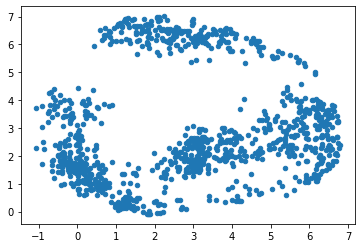

In [118]:
plt.scatter(ukb_red.umap_0, ukb_red.umap_1, s=20)

In [119]:
ukb_umap_red, reducer_red = compute_umap(ukb_red[4:], n_neighbors=15)

In [120]:
red_id = skdim.id.MOM().fit(ukb_red[4:], n_neighbors=500)
red_id.dimension_

4.637984546470165

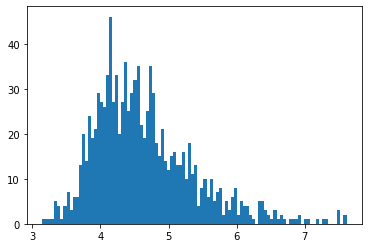

In [121]:
h = plt.hist(red_id.dimension_pw_, bins=100)

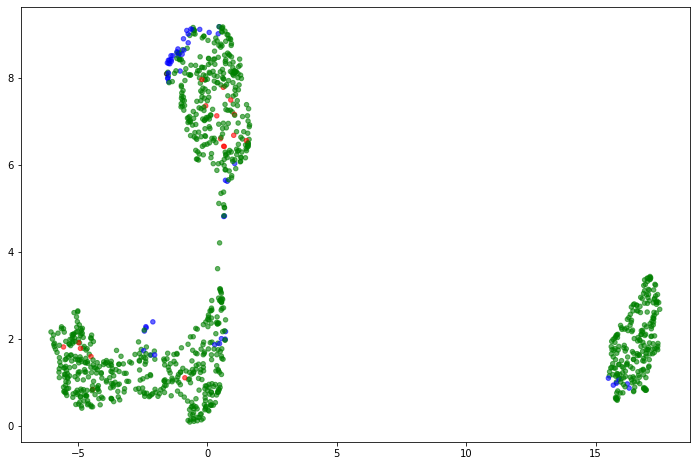

In [122]:
plt.figure(figsize=(12,8))
q_min = np.min(red_id.dimension_pw_)
q_05 = np.quantile(red_id.dimension_pw_, 0.05) 
q_95 = np.quantile(red_id.dimension_pw_, 0.95)
q_max = np.max(red_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, 3.5, q_95, q_max], ['red', 'green', 'blue'])
alpha = []
plt.scatter(ukb_umap_red[:,0], ukb_umap_red[:,1], s=20, c=red_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

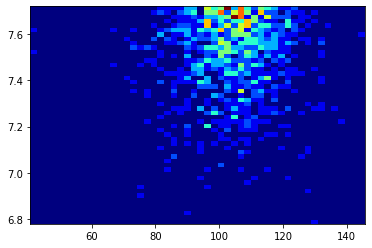

In [123]:
heatmap, xedges, yedges = np.histogram2d(ukb_red.distance, ukb_red.id, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [124]:
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1002584,7.464054,5.472576,2.002522,92.064701,5.621493,-6.895737,10.349473,6.147973,-0.832192,-0.282892,...,5.245121,23.535913,-5.346692,22.328972,-6.155644,24.710846,-6.598261,5.300726,29.379500,7.041295
sub-1006097,7.306527,-0.051977,2.668932,89.774906,1.254824,-17.310130,32.025290,3.623910,5.134946,6.832333,...,0.934025,6.774837,-22.181198,-5.505931,12.717887,8.888285,-10.204882,-11.681721,7.687145,19.979074
sub-1007866,7.309080,0.539803,1.046721,107.616995,2.209210,-7.509896,35.474422,-20.676937,2.467556,-4.702992,...,0.270972,22.631388,-18.574905,1.083776,10.166616,17.543594,3.071011,-8.797299,0.605569,12.312674
sub-1012329,7.252277,2.623425,1.610947,101.236413,1.968421,-1.434481,12.205021,-14.044964,5.453908,12.518558,...,6.196481,1.477249,13.827998,10.497029,11.021888,16.191470,21.752748,-14.743492,0.606968,12.626747
sub-1015083,7.376817,1.839252,6.569149,116.409795,-3.707436,-1.117246,18.015078,14.045575,-4.154909,1.062125,...,7.328311,-7.248618,16.632086,9.120641,8.634240,-36.128273,-14.080964,-7.328787,7.046294,-18.660288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6004974,7.628281,0.581224,0.993376,92.936520,10.042882,-6.201372,32.555737,-21.294730,2.630222,3.276985,...,-12.179600,13.315239,-14.034972,-3.282513,0.927338,31.890556,10.591652,-21.872454,-7.515748,4.491962
sub-6010617,7.555809,5.025192,0.805641,99.900735,-0.655809,-3.651391,15.025037,8.718845,-6.228729,-0.254457,...,-12.828527,7.365428,-4.411138,11.551176,-8.995800,19.935040,-2.849926,4.072288,11.316485,18.615892
sub-6012830,7.480053,0.178943,1.713220,120.085737,-2.684937,-2.507551,32.051630,-15.441390,-2.252284,-4.828686,...,-10.397220,-15.629594,-9.914756,8.346049,13.539639,-7.593283,14.767836,-10.686011,-16.064901,18.927000


In [125]:
ukb_red2 = ukb_red[ukb_red.umap_0 > 6]
ukb_red2

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1023965,7.530602,6.748515,3.265471,117.341750,-7.960197,11.900088,11.262513,0.381375,-18.247236,-1.932724,...,-11.392126,0.829165,-14.508329,50.324500,-3.861849,-1.345336,-2.993502,15.223021,43.949833,-11.468591
sub-1042595,7.251124,6.795331,2.390896,108.095203,-5.854940,4.469547,16.722840,-7.372023,-11.976622,-4.030450,...,-6.394821,2.505192,-5.378130,24.598228,10.693652,13.168372,3.512628,18.059124,38.029620,3.610226
sub-1127849,7.539521,6.134176,2.135856,106.259524,5.988576,15.724705,17.478203,-12.836290,-25.364980,-5.548070,...,-21.079613,-4.904382,-20.887508,22.360004,12.040967,36.585876,20.676819,2.667523,29.457530,-9.778794
sub-1136748,7.450617,6.329243,1.805567,108.781817,-3.809124,3.047137,16.220812,-3.935207,-12.679149,1.598623,...,-7.997972,4.578116,9.680549,23.170490,-3.826946,25.095394,-7.733099,-4.799375,33.898083,0.119964
sub-1153875,7.466638,6.489264,3.633224,105.911932,-0.461289,4.197360,15.427986,3.345926,-8.320233,0.263101,...,5.239262,16.736850,14.403742,17.262747,7.126998,10.570866,-11.341250,22.140802,34.571190,-3.215378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-5693167,7.153691,6.373736,3.061197,100.669065,-0.538097,2.742055,18.173296,-7.265242,-6.953059,-13.900790,...,-1.870435,16.464401,-11.412477,23.118612,9.259024,16.257338,-5.081836,9.282659,25.676100,-1.540686
sub-5778011,7.403423,6.541334,3.423958,90.971851,-6.076055,2.299298,20.491093,-1.782002,-17.763035,0.560454,...,-12.028086,1.921534,3.472310,35.190475,-4.546379,4.906031,-14.754670,13.230937,24.593046,-7.250976
sub-5866081,7.390148,6.371645,3.125304,106.211045,-6.643163,-0.899966,10.939730,8.989881,-16.509863,11.714997,...,-14.962262,1.775314,4.466102,34.316147,-18.170261,9.041987,-13.371849,23.860834,25.148424,4.409085


In [126]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_emb)
explained_all = my_model.explained_variance_ratio_.cumsum()

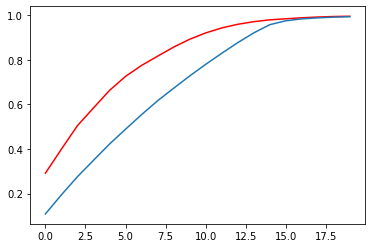

In [127]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_red2[4:])
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)
plt.show()

In [128]:
reduced_ukb_emb.shape

(21051, 20)

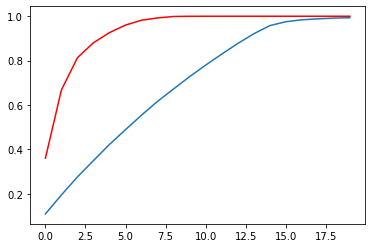

In [129]:
my_model = PCA(n_components=20)
on_axes = my_model.fit_transform(reduced_ukb_emb)
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)
plt.show()

In [130]:
explained

array([0.3601612 , 0.6679419 , 0.81319517, 0.8805659 , 0.92619085,
       0.96016055, 0.982056  , 0.99239784, 0.998876  , 0.9998433 ,
       0.9999909 , 0.9999947 , 0.99999756, 0.99999964, 0.9999998 ,
       0.9999998 , 0.9999998 , 0.9999998 , 0.9999998 , 0.9999998 ],
      dtype=float32)

In [131]:
on_axes.shape

(21051, 20)

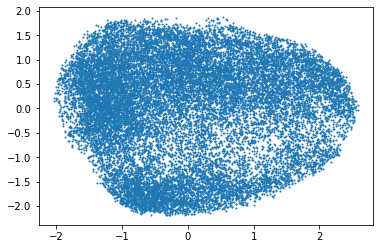

In [132]:
plt.scatter(on_axes[:,0], on_axes[:,1], s=1)

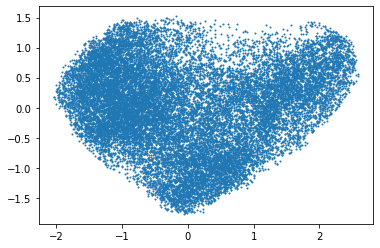

In [133]:
plt.scatter(on_axes[:,0], on_axes[:,2], s=1)
plt.show()

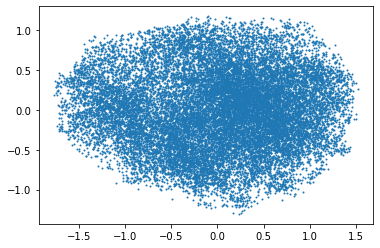

In [134]:
plt.scatter(on_axes[:,2], on_axes[:,3], s=1)
plt.show()

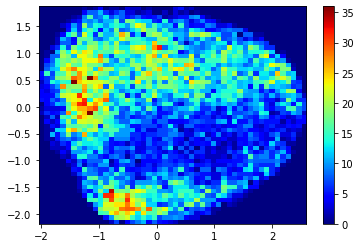

In [135]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

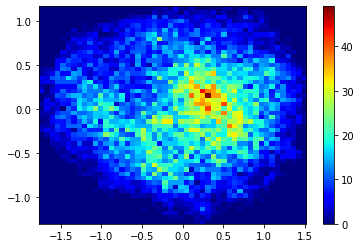

In [170]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,2], on_axes[:,3], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

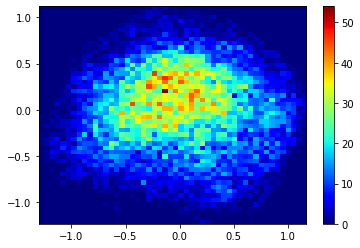

In [171]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,3], on_axes[:,4], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

In [165]:
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=0.3, fit_inverse_transform=True, alpha=0.1
)
X_kernel_pca = kernel_pca.fit(on_axes[:3000,0:5])

In [166]:
X_kernel_pca =  kernel_pca.transform(on_axes[:,0:5])

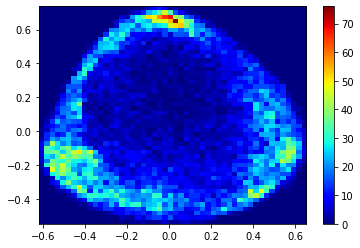

In [167]:
heatmap, xedges, yedges = np.histogram2d(X_kernel_pca[:,0], X_kernel_pca[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

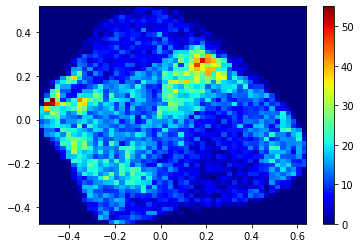

In [168]:
heatmap, xedges, yedges = np.histogram2d(X_kernel_pca[:,2], X_kernel_pca[:,3], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

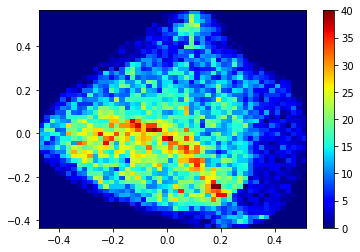

In [169]:
heatmap, xedges, yedges = np.histogram2d(X_kernel_pca[:,3], X_kernel_pca[:,4], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

In [139]:
def cart2pol(x, y, offset):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x) + offset
    return(rho, np.mod(phi, 2*np.pi))

In [151]:
rho, phi = cart2pol(X_kernel_pca[:,0], X_kernel_pca[:,1], np.pi/2)

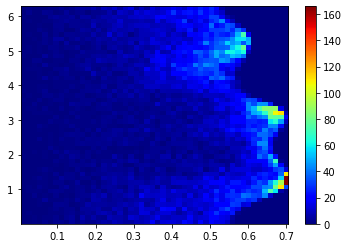

In [152]:
heatmap, xedges, yedges = np.histogram2d(rho, phi, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

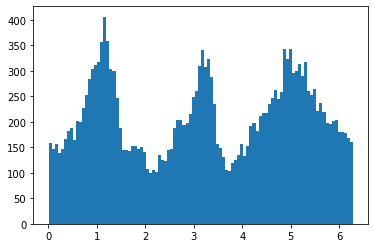

In [153]:
h = plt.hist(phi, bins=100)

In [154]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=False, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

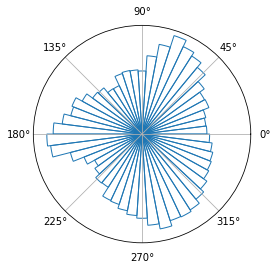

In [155]:
# Construct figure and axis to plot on
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))

# Visualise by area of bins
h = circular_hist(ax, phi, bins=50)

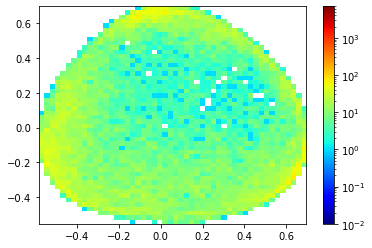

In [156]:
heatmap, xedges, yedges = np.histogram2d(X_kernel_pca[:,0], X_kernel_pca[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet, norm=LogNorm(vmin=0.01, vmax=7000))
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

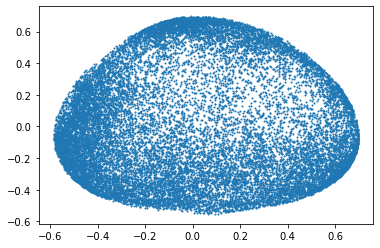

In [157]:
plt.scatter(X_kernel_pca[:,0], X_kernel_pca[:,1], s=1)
plt.show()

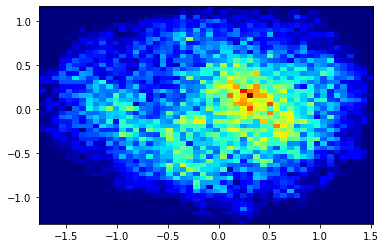

In [158]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,2], on_axes[:,3], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [148]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

X = ukb_emb
umap_embedding = reduced_ukb_emb

#MNIST variation explained by UMAP1
UMAP_matrix = pd.DataFrame(umap_embedding)
pls = PLSRegression(n_components = 1)
pls.fit(UMAP_matrix, X)
y_pred = pls.predict(UMAP_matrix)
print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
#0.07335034485651613

#Here the same but more explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07335034485652026


#Here the same but explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07265918428991347

0.066950448064784
dim1     -1274.484485
dim2      -547.407420
dim3      -402.868430
dim4      -227.876002
dim5      -233.508276
             ...     
dim252    -203.368734
dim253    -265.232294
dim254    -362.339963
dim255    -176.322828
dim256    -170.705124
Length: 256, dtype: float64
dim1     -1274.484485
dim2      -547.407420
dim3      -402.868430
dim4      -227.876002
dim5      -233.508276
             ...     
dim252    -203.368734
dim253    -265.232294
dim254    -362.339963
dim255    -176.322828
dim256    -170.705124
Length: 256, dtype: float64


In [149]:
X = reduced_ukb_emb

explainable = np.zeros((X.shape[1],1))
for i in range(X.shape[1]):
    umap_embedding = reduced_ukb_emb[:,i]

    #MNIST variation explained by UMAP1
    UMAP_matrix = pd.DataFrame(umap_embedding)
    pls = PLSRegression(n_components = 1)
    pls.fit(UMAP_matrix, X)
    y_pred = pls.predict(UMAP_matrix)
    print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
    #0.07335034485651613

    #Here the same but more explicitly via the R^2 equation above
    # print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    # np.mean(X, axis = 0))**2))
    #0.07335034485652026


    #Here the same but explicitly via the R^2 equation above
    explainable[i] = 1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    np.mean(X, axis = 0))**2)
    #0.07265918428991347

0.353847976388896
0.30587817615514423
0.18357862531097244
0.0906211133477366
0.06842429846274654
0.06334364329031598
0.04217556629190596
0.0691865817869546
0.05966673263421241
0.13626421068170433
0.1103000000869045
0.04814379135243472
0.10864902043719567
0.06400273191564282
0.07552412413810485
0.21393578384159287
0.052962010236198606
0.20113994505983987
0.1513849300135515
0.21184386555889825


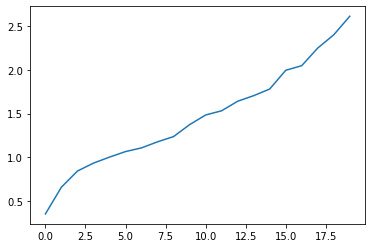

In [150]:
plt.plot(explainable.cumsum())